In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [5]:
np.unique(train_dataset['R'])

array([ 5, 20, 50])

In [6]:
np.unique(train_dataset['breath_id'], return_counts = True)

(array([     1,      2,      3, ..., 125743, 125745, 125749],
       shape=(75450,)),
 array([80, 80, 80, ..., 80, 80, 80], shape=(75450,)))

In [7]:
final_dataset = train_dataset.groupby('breath_id')
final_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [8]:
data = train_dataset.groupby(["breath_id"])
data.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


# Features Engineering

In [9]:
train_dataset['un_in_std'] = data['u_in'].transform(lambda x: (x - x.mean()) / x.std())
train_dataset['time_step_std'] = data['time_step'].transform(lambda x: (x - x.mean()) / x.std())

In [9]:
train_dataset['time_step_after'] = data[['time_step_std']].shift()
train_dataset['u_in_after'] = data[['un_in_std']].shift()
train_dataset['u_out_after'] = data[['u_out']].shift()
train_dataset['time_step_back'] = data[['time_step_std']].shift(-1)
train_dataset['u_in_back'] = data[['un_in_std']].shift(-1)
train_dataset['u_out_back'] = data[['u_out']].shift(-1)
train_dataset['time_step_after2'] = data[['time_step_std']].shift(2)
train_dataset['u_in_after2'] = data[['un_in_std']].shift(2)
train_dataset['u_out_after2'] = data[['u_out']].shift(2)
train_dataset['time_step_back2'] = data[['time_step_std']].shift(-2)
train_dataset['u_in_back2'] = data[['un_in_std']].shift(-2)
train_dataset['u_out_back2'] = data[['u_out']].shift(-2)
train_dataset['time_step_after3'] = data[['time_step_std']].shift(3)
train_dataset['u_in_after3'] = data[['un_in_std']].shift(3)
train_dataset['u_out_after3'] = data[['u_out']].shift(3)
train_dataset['time_step_back3'] = data[['time_step_std']].shift(-3)
train_dataset['u_in_back3'] = data[['un_in_std']].shift(-3)
train_dataset['u_out_back3'] = data[['u_out']].shift(-3)
train_dataset['time_step_after4'] = data[['time_step_std']].shift(4)
train_dataset['u_in_after4'] = data[['un_in_std']].shift(4)
train_dataset['u_out_after4'] = data[['u_out']].shift(4)
train_dataset['time_step_back4'] = data[['time_step_std']].shift(-4)
train_dataset['u_in_back4'] = data[['un_in_std']].shift(-4)
train_dataset['u_out_back4'] = data[['u_out']].shift(-4)
train_dataset['time_step_after5'] = data[['time_step_std']].shift(5)
train_dataset['u_in_after5'] = data[['un_in_std']].shift(5)
train_dataset['u_out_after5'] = data[['u_out']].shift(5)
train_dataset['time_step_back5'] = data[['time_step_std']].shift(-5)
train_dataset['u_in_back5'] = data[['un_in_std']].shift(-5)
train_dataset['u_out_back5'] = data[['u_out']].shift(-5)

In [ ]:
train_dataset.head()

In [10]:
train_dataset.fillna(0, inplace = True)

In [ ]:
train_dataset.head()

In [11]:
features = train_dataset.drop(['pressure', 'id', 'breath_id', 'u_in', 'time_step'], axis = 1)
target = train_dataset['pressure']

In [ ]:
features.head()

In [12]:
features = np.array(features)
features.shape

(6036000, 35)

In [13]:
features = features.reshape(int(features.shape[0]/80), 80, features.shape[1])
features.shape

(75450, 80, 35)

In [14]:
target = np.array(target)
target.shape

(6036000,)

In [15]:
target = target.reshape(75450, 80)
target.shape

(75450, 80)

# Deep Learning Model

In [16]:
norm = tf.keras.layers.Normalization(input_shape = [80, features.shape[2],], axis = -1)
norm.adapt(features)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
m = tf.keras.Sequential([
    norm,
    tf.keras.layers.Conv1D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80,)
])
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [18]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 80, 35)              │              71 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 78, 128)             │          13,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 39, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 39, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 37, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 18, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 18, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 18, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │          20,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 922,775 (3.52 MB)

 Trainable params: 921,936 (3.52 MB)

 Non-trainable params: 839 (3.28 KB)

# Training Model

In [ ]:
history = m.fit(features, target, validation_split = 0.2, epochs = 650, batch_size = 512,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 260,
                                                              monitor = 'val_loss',
                                                              mode = 'min',
                                                              restore_best_weights=True)])

# Results:

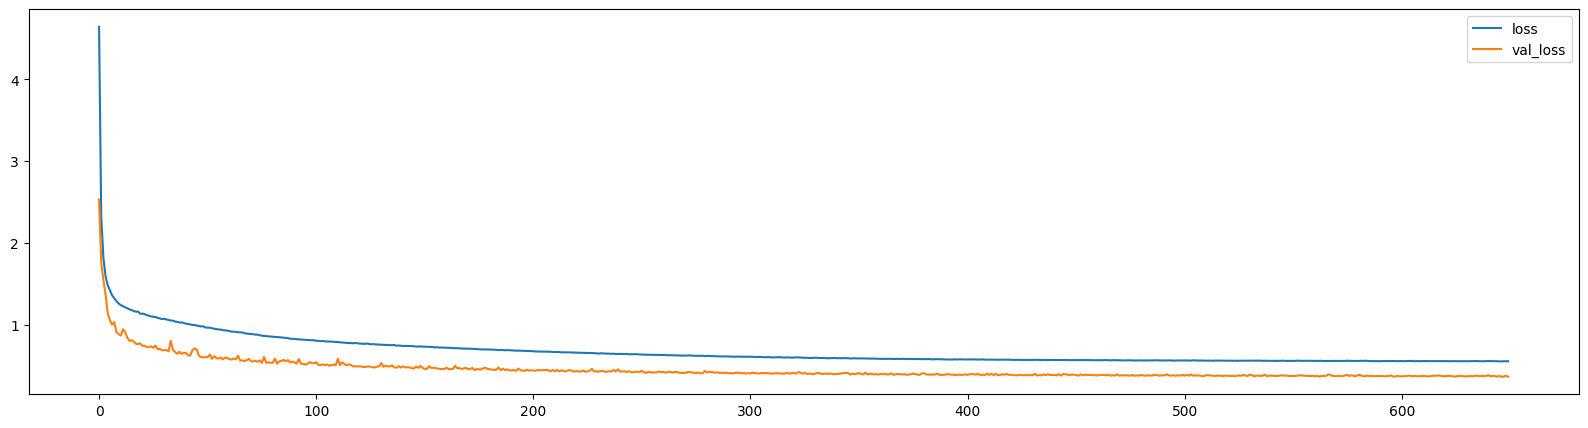

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [ ]:
m.evaluate(features, target)

In [22]:
y_pred = m.predict(features, batch_size = 512)

148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [23]:
target[0]

array([ 5.83749171,  5.90779385,  7.87625392, 11.74287192, 12.23498694,
       12.86770625, 14.69556203, 15.8906985 , 15.53918778, 15.75009421,
       17.29674141, 17.22643927, 16.17190709, 17.36704356, 18.07006501,
       17.15613712, 18.28097145, 18.77308647, 17.85915858, 19.1245972 ,
       19.33550363, 18.49187789, 18.56218003, 18.63248218, 18.84338861,
       19.05429505, 19.26520149, 19.33550363, 19.33550363, 19.47610792,
       19.54641007, 17.01553283,  9.56350541,  7.87625392,  8.64957752,
        7.59504534,  7.66534749,  8.2980668 ,  7.24353461,  7.94655607,
        7.59504534,  7.45444105,  8.1574625 ,  6.82172174,  7.17323247,
        7.5247432 ,  6.96232603,  7.45444105,  7.59504534,  7.17323247,
        7.73564963,  7.24353461,  7.59504534,  7.3841389 ,  7.24353461,
        7.73564963,  7.5247432 ,  6.96232603,  7.10293032,  7.31383676,
        6.11870029,  7.03262818,  6.82172174,  6.54051316,  6.96232603,
        6.82172174,  6.54051316,  6.82172174,  6.82172174,  6.39

In [24]:
y_pred[0]

array([ 5.984424 ,  5.906701 ,  8.185435 , 11.588479 , 12.715378 ,
       13.10095  , 14.684084 , 15.491346 , 15.370783 , 16.034105 ,
       17.114452 , 17.04445  , 16.558485 , 17.113789 , 17.631483 ,
       17.539669 , 17.818853 , 18.188408 , 18.293423 , 18.476974 ,
       18.731768 , 18.661938 , 18.566017 , 18.811941 , 18.967627 ,
       19.015015 , 19.227411 , 19.322035 , 19.328285 , 19.544176 ,
       19.30406  , 16.615465 ,  9.518962 ,  8.363969 ,  7.9841156,
        7.744398 ,  7.671254 ,  7.605224 ,  7.5550632,  7.4473095,
        7.426134 ,  7.299563 ,  7.242528 ,  7.1590734,  7.0813212,
        7.0647874,  7.0738583,  7.0267577,  7.12913  ,  7.164509 ,
        7.295415 ,  7.293615 ,  7.185378 ,  7.13396  ,  7.007428 ,
        7.1188087,  7.0616465,  6.888804 ,  7.0912786,  6.9392533,
        6.7478   ,  6.737326 ,  6.7470746,  6.663721 ,  6.5957847,
        6.7035704,  6.5983915,  6.5571966,  6.5485415,  6.4678946,
        6.4837894,  6.467898 ,  6.4313436,  6.435649 ,  6.4203

In [25]:
def draw_result(start, end, target, y_pred):
  plt.figure(figsize = (20, 7))
  plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual Pressure values")
  plt.plot(np.reshape(y_pred[start:end], -1), linewidth=2, label = "predict Pressure values")
  plt.legend()

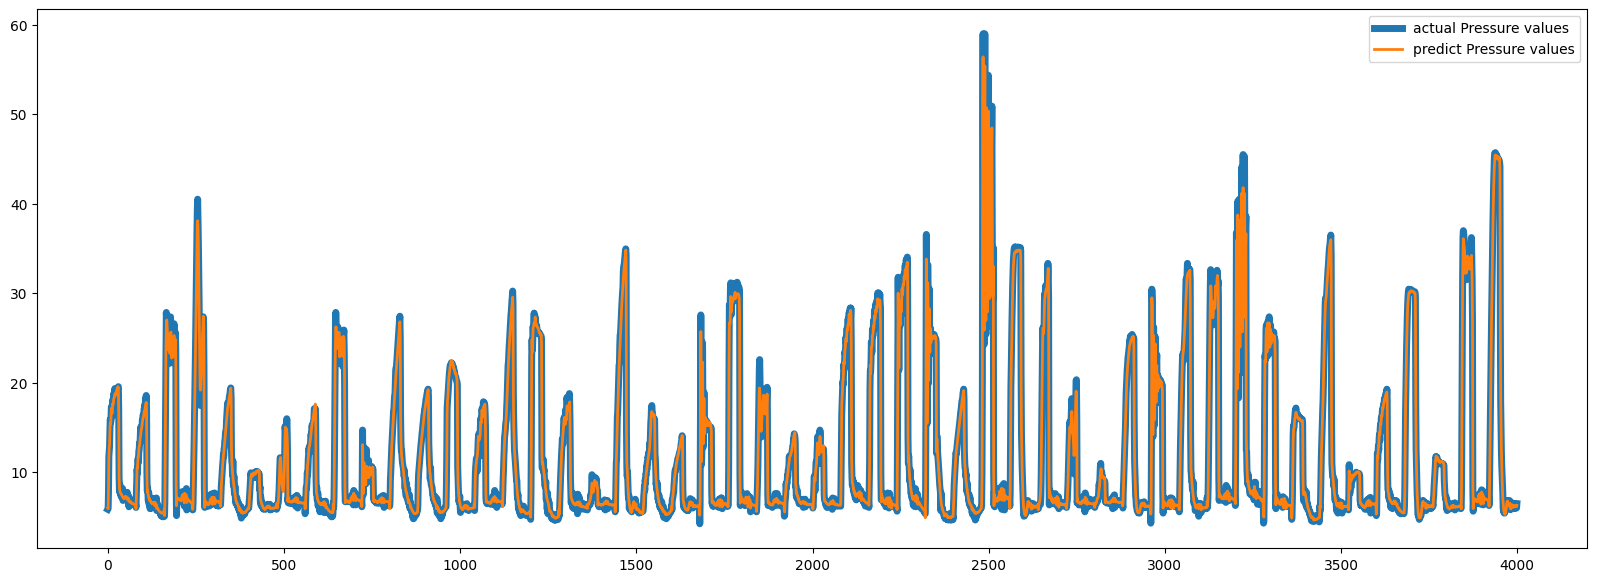

In [26]:
draw_result(0, 50, target, y_pred)

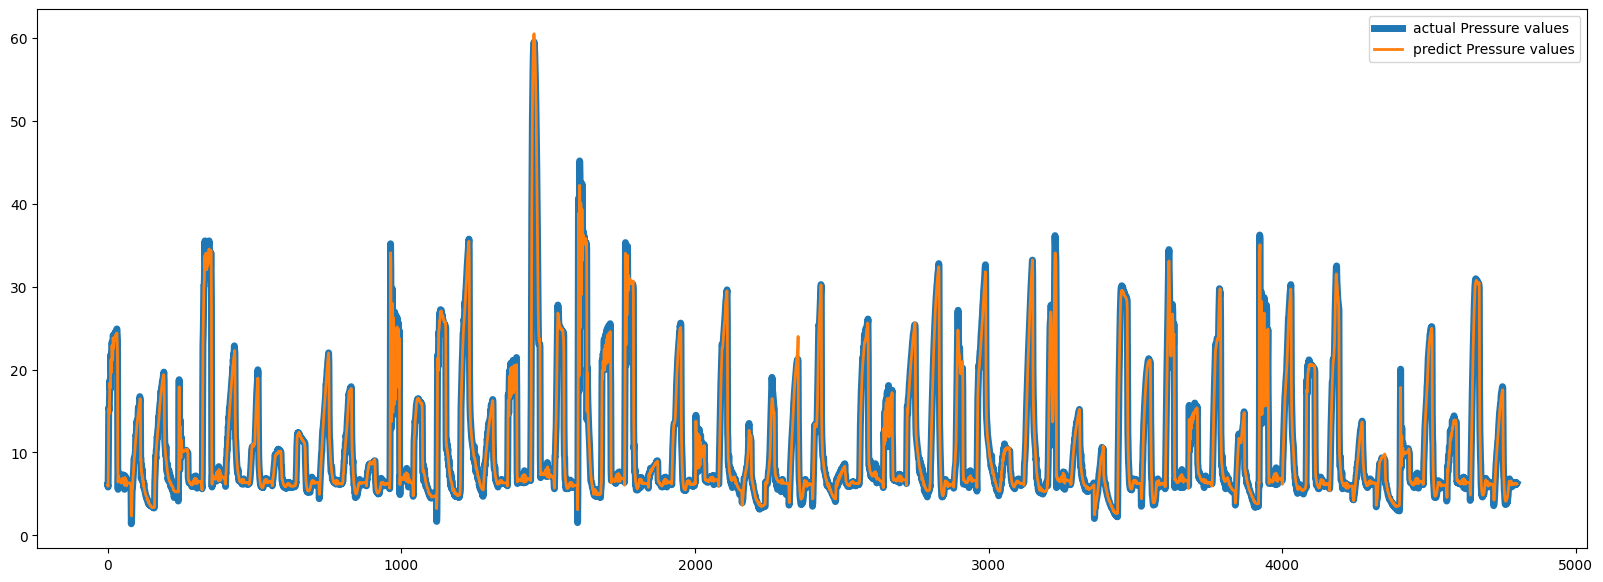

In [27]:
draw_result(50, 110, target, y_pred)

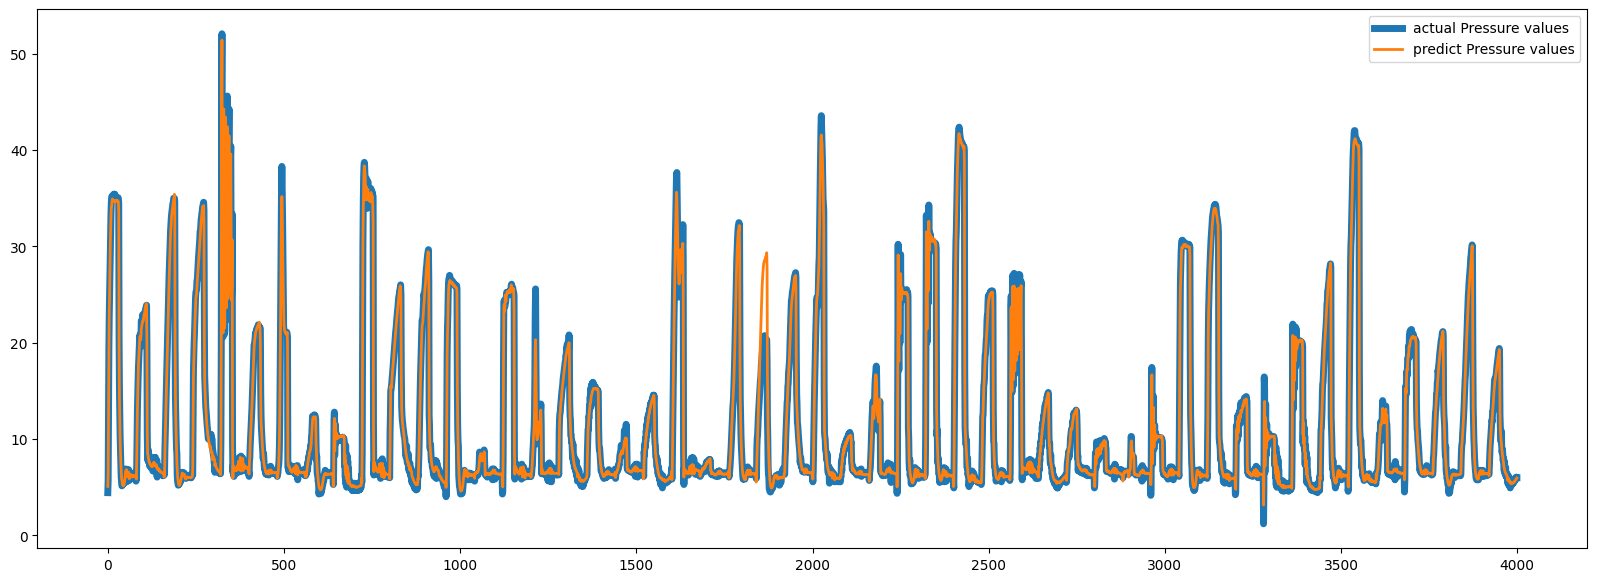

In [28]:
draw_result(110, 160, target, y_pred)

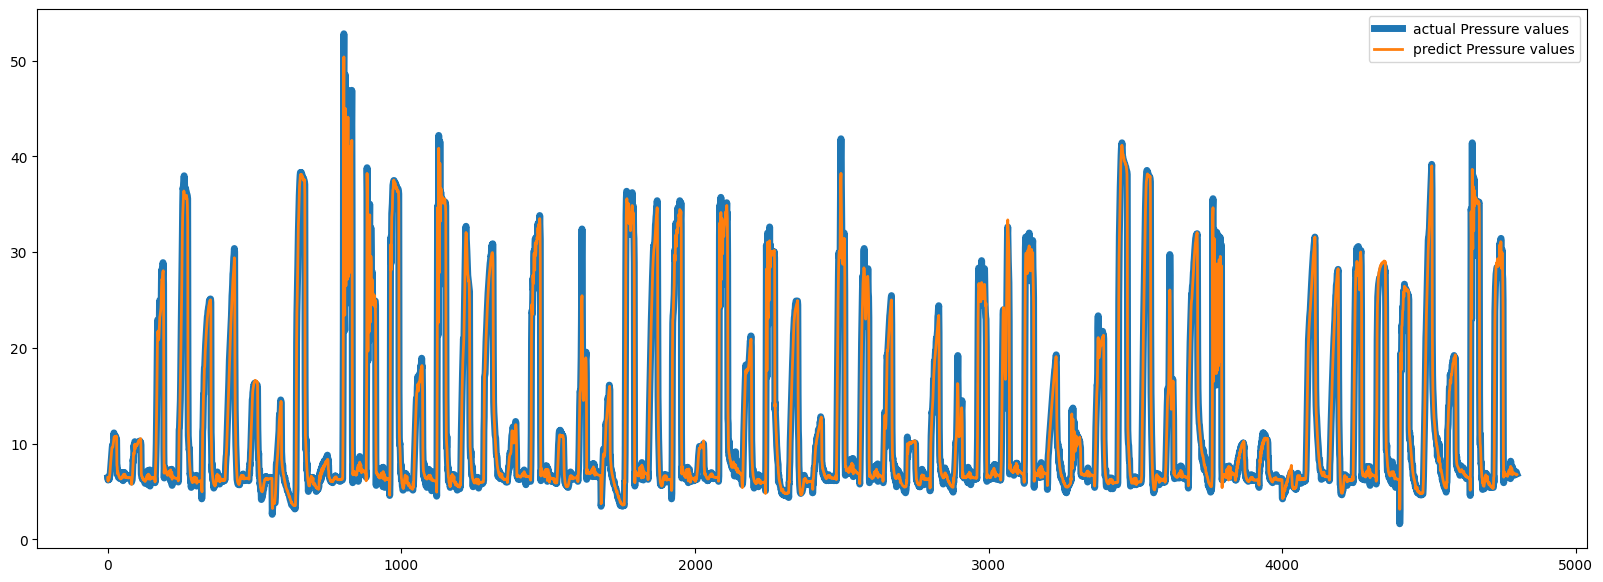

In [29]:
draw_result(160, 220, target, y_pred)

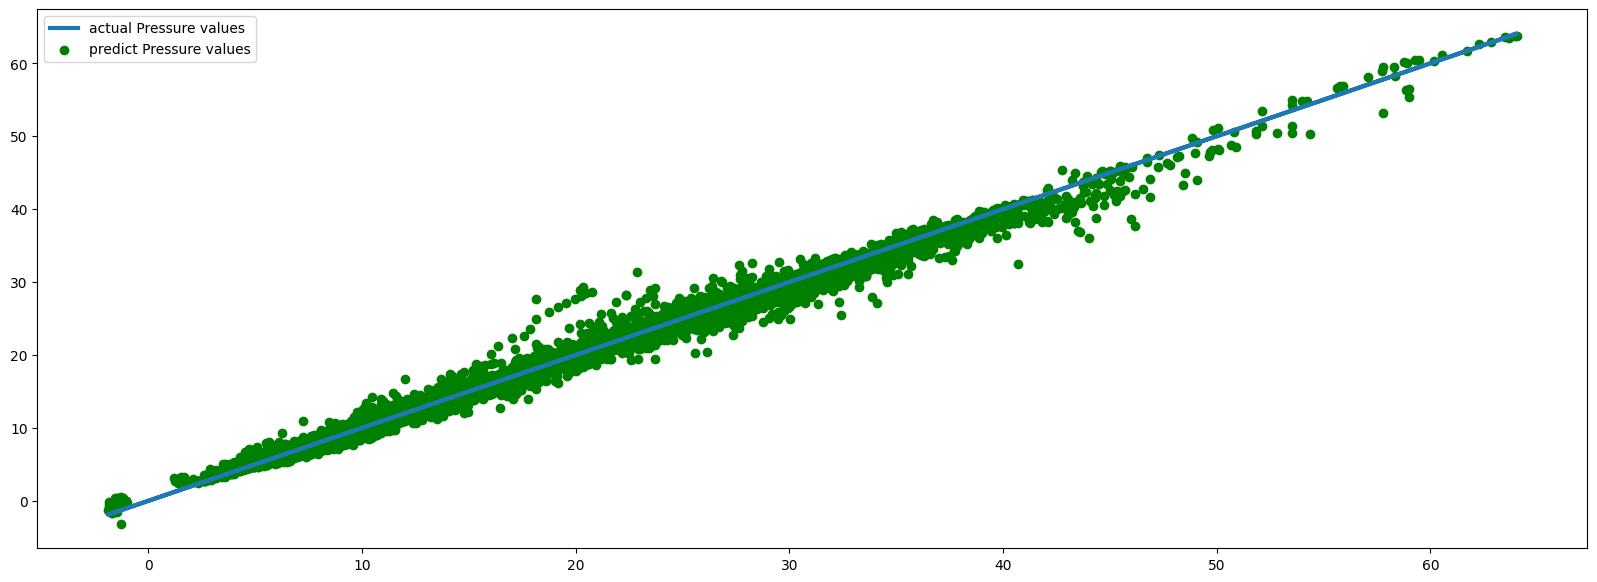

In [30]:
plt.figure(figsize = (20, 7))
plt.plot(np.reshape(target[:500], -1), np.reshape(target[:500], -1), linewidth=3, label = "actual Pressure values")
plt.scatter(np.reshape(target[:500], -1), np.reshape(y_pred[:500], -1), c = 'g', label = "predict Pressure values")
plt.legend()

In [31]:
def create_table(target, y_pred):
  target = np.reshape(target, -1)
  y_pred = np.reshape(y_pred, -1)
  return pd.DataFrame({
      "actual Pressure values": target,
      "predict Pressure values": y_pred,
      "diff": np.abs(target - y_pred)
  })

In [32]:
create_table(target, y_pred).head(40)

,actual Pressure values,predict Pressure values,diff
0,5.837492,5.984424,0.146932
1,5.907794,5.906701,0.001093
2,7.876254,8.185435,0.309181
3,11.742872,11.588479,0.154393
4,12.234987,12.715378,0.480391
5,12.867706,13.100950,0.233244
6,14.695562,14.684084,0.011478
7,15.890699,15.491346,0.399352
8,15.539188,15.370783,0.168405
9,15.750094,16.034105,0.284011


In [35]:
m.save("ICU_PressurePrediction.keras")